## MOD300:Project 4

## Task 0: Install the python library from the page: milkyway-plot.readthedocs.io

In [1]:
# install all necessary packages
"""
%pip install git+https://github.com/henrysky/milkyway_plot.git

%pip install scikit-learn"""

'\n%pip install git+https://github.com/henrysky/milkyway_plot.git\n\n%pip install scikit-learn'

In [2]:
#import necessary packages
import numpy as np
from astropy import units as u
from mw_plot import MWFaceOn
import matplotlib.pyplot as plt
from a import (plt2rgbarr,
               plot_mw_skymap,
               convert_to_rgb,
               grey_encoding,
               red_encoding,
               gen_milkyway,
               blue_encoding,
               kmeans_cluster_image,
               overlay_clusters_on_image)

## Task 1: reproduce the image of the milky way via MWSkyMap with help of function gen_milkyway

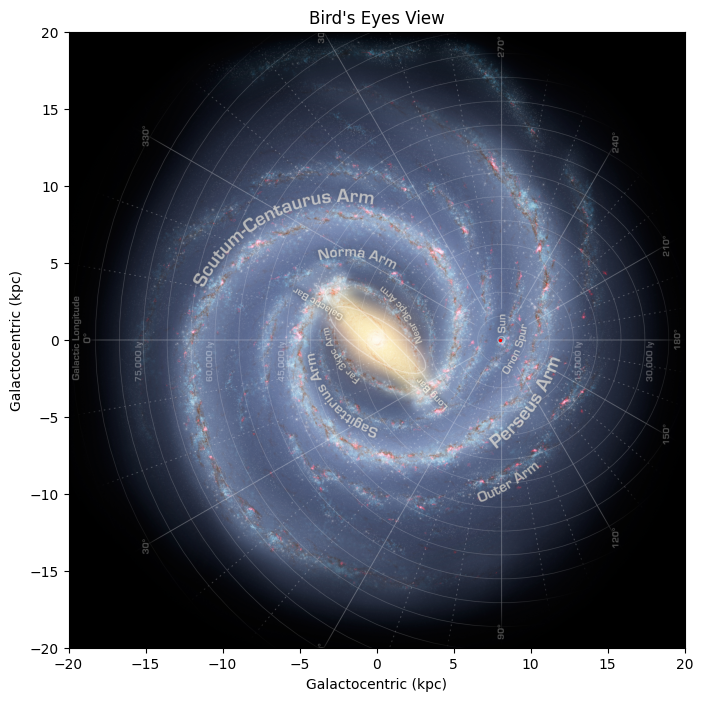

In [3]:
# Generate Milky Way Galaxy plots
mw1 = gen_milkyway()

## Task 2: Generate a few visualizations of the milky way sector starting in different centers (try "M31") and with different radius

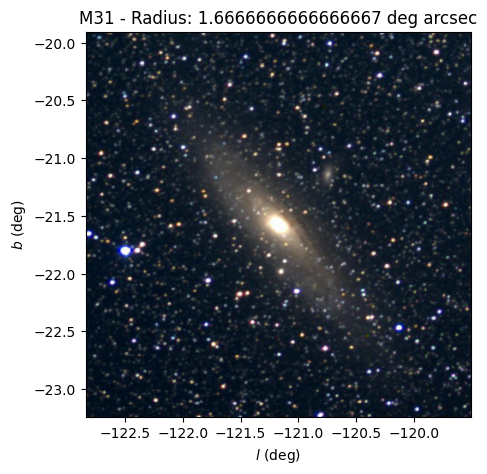

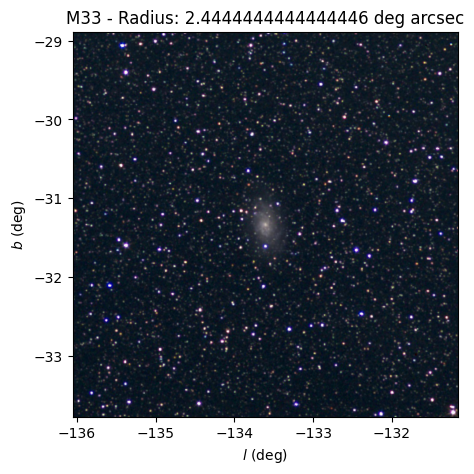

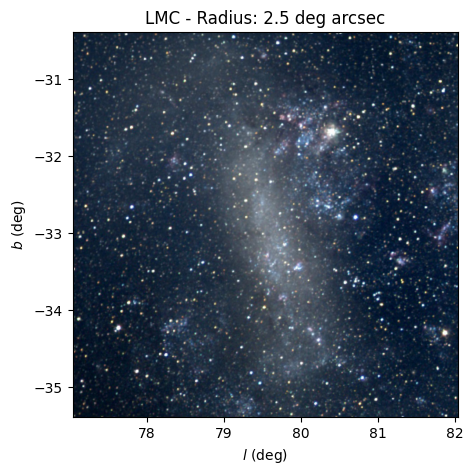

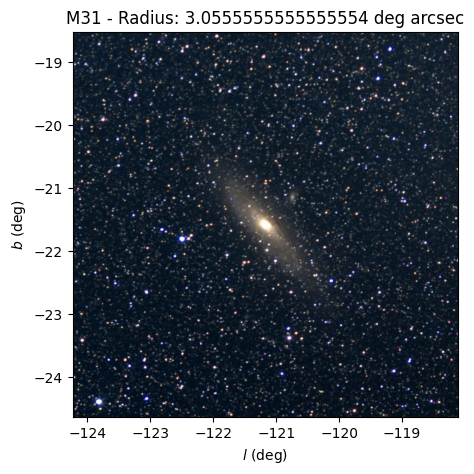

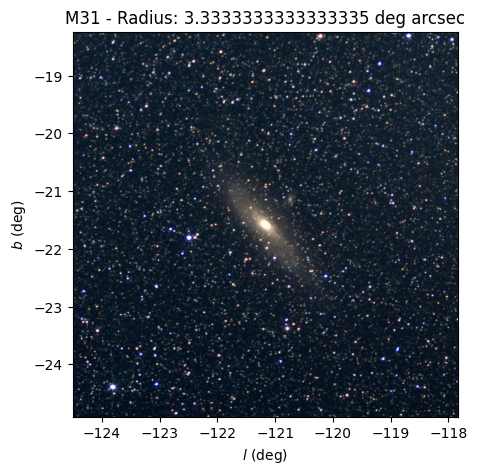

In [4]:
img_1 = plot_mw_skymap("M31", (6000, 6000) * u.arcsec, "Mellinger color optical survey")
img_2 = plot_mw_skymap("M33", (8800, 8800) * u.arcsec, "Mellinger color optical survey")
img_3 = plot_mw_skymap("LMC", (9000, 9000) * u.arcsec, "Mellinger color optical survey")
img_4 = plot_mw_skymap("M31", (11000, 11000) * u.arcsec, "Mellinger color optical survey")
img_5 = plot_mw_skymap("M31", (12000, 12000) * u.arcsec, "Mellinger color optical survey")

## Task 3: Convert the image generated into a rgb np.array (each pixel will be a list of 3 number, Red, Green, Blue (rbg))

In [5]:
mw1_array = convert_to_rgb(mw1.fig)
img_1_array = convert_to_rgb(img_1)
img_2_array = convert_to_rgb(img_2)
img_3_array =convert_to_rgb(img_3)
img_4_array =convert_to_rgb(img_4)
img_5_array =convert_to_rgb(img_5)


Image properties: 
Image array shape:(800, 1000, 3)
Image array dtype: uint8
Image array min, max values: 0, 255
First pixel RGB values: [255 255 255]

Image properties: 
Image array shape:(500, 500, 3)
Image array dtype: uint8
Image array min, max values: 0, 255
First pixel RGB values: [0 0 0]

Image properties: 
Image array shape:(500, 500, 3)
Image array dtype: uint8
Image array min, max values: 0, 254
First pixel RGB values: [0 0 0]

Image properties: 
Image array shape:(500, 500, 3)
Image array dtype: uint8
Image array min, max values: 0, 254
First pixel RGB values: [0 0 0]

Image properties: 
Image array shape:(500, 500, 3)
Image array dtype: uint8
Image array min, max values: 0, 254
First pixel RGB values: [0 0 0]

Image properties: 
Image array shape:(500, 500, 3)
Image array dtype: uint8
Image array min, max values: 0, 254
First pixel RGB values: [0 0 0]


## Task 4: Ideate, describe in words and generate a set of categories from the task 3 data (e.g. red? Grey? ). This is your encoding

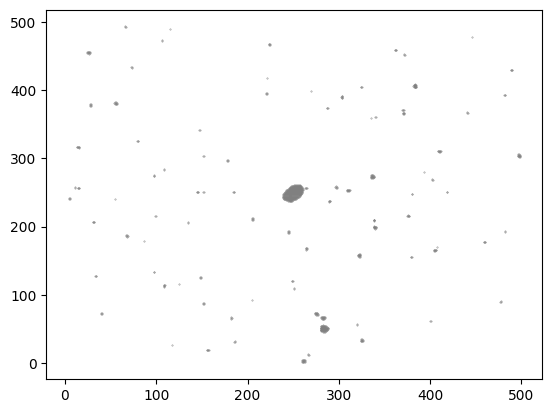

In [6]:
grey_encoding(img_1_array)

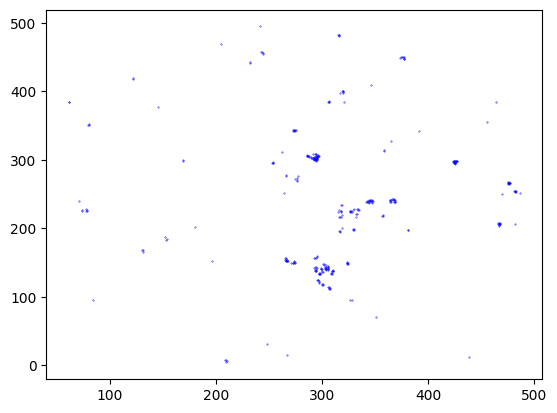

In [7]:
blue_encoding(img_3_array)

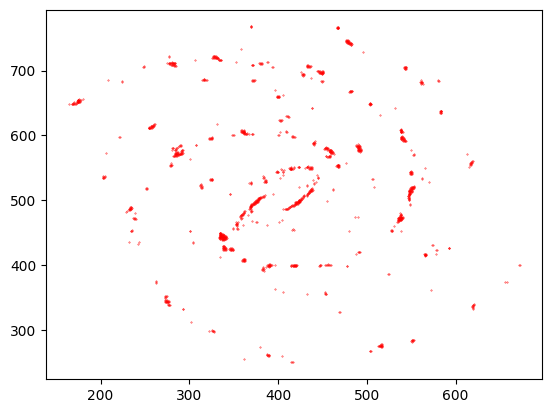

In [17]:
red_encoding(mw1_array)

## Task 5

K-means done with k=3.
Label image shape: (800, 1000)


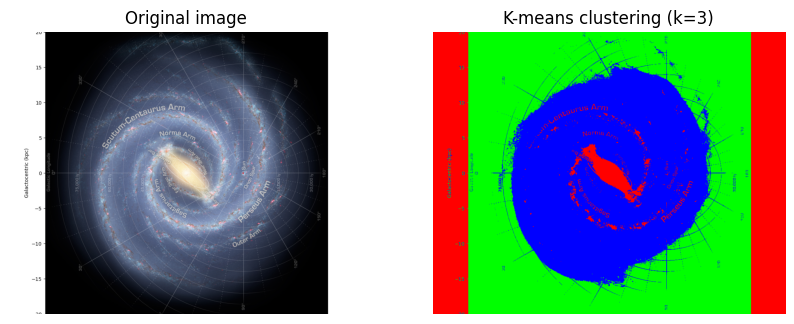

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], shape=(800, 1000), dtype=int32),
 KMeans(n_clusters=3, random_state=0))

In [9]:
kmeans_cluster_image(mw1_array)

K-means done with k=3.
Label image shape: (800, 1000)


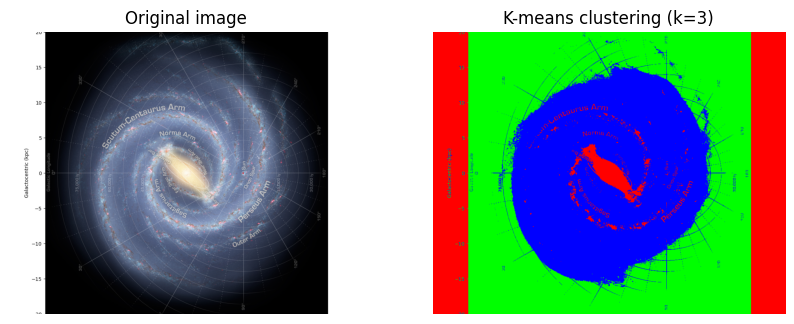

In [10]:
label_image, kmeans_model = kmeans_cluster_image(mw1_array, k=3)

## Task 6:

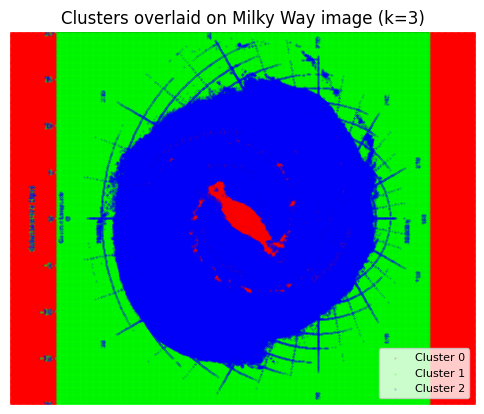

In [11]:
fig_clusters, ax_clusters = overlay_clusters_on_image(mw1_array, label_image, alpha=0.4, point_size=0.1)

In [12]:

label_image, kmeans_model = kmeans_cluster_image(mw1_array, k=3, normalize=True, show_plot=False)


K-means done with k=3.
Label image shape: (800, 1000)


## Taks 7:

In [22]:

from sklearn.cluster import KMeans

# Build a simple brightness-based feature from mw1_array
# Convert RGB to greyscale intensity using luminosity method
brightness = np.dot(mw1_array[..., :3], np.array([0.299, 0.587, 0.114]))

# Flatten to (num_pixels, 1)
X_bright = brightness.reshape(-1, 1).astype(float)

# Normalize to [0, 1]
X_bright /= 255.0

# K-means with k=3 on brightness only
k_bright = 3
kmeans_bright = KMeans(n_clusters=k_bright, random_state=0, n_init=10)
kmeans_bright.fit(X_bright)

labels_bright = kmeans_bright.labels_.reshape(brightness.shape)
print('Brightness-based labels shape:', labels_bright.shape)

Brightness-based labels shape: (800, 1000)


In [19]:
{
  "cell_type": "code",
  "metadata": { "language": "python" },
  "source": [
    "fig_bright, ax_bright = overlay_clusters_on_image(mw1_array, labels_bright, alpha=0.4, point_size=0.1)"
  ]
}

{'cell_type': 'code',
 'metadata': {'language': 'python'},
 'source': ['fig_bright, ax_bright = overlay_clusters_on_image(mw1_array, labels_bright, alpha=0.4, point_size=0.1)']}